In [7]:
import torch

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

from torchvision.transforms import Grayscale
%matplotlib inline

In [8]:
def plot_all (images, figsize=(20,10), axis='off'):
    fig = plt.figure(figsize=figsize, dpi=80)

    nplots = len(images)

    for i in range(nplots):

        plt.subplot(1,nplots,i+1)
        plt.axis(axis)
        plt.imshow(images[i])

    plt.show()

to_grayscale = Grayscale()

def resize_img(img, scale=8):
    '''
    Resizes a PIL image returning a np array.
    '''
    img_np = np.asarray(img)
    img_np = cv.resize(img_np, (0,0), fx = 1/scale, fy=1/scale, interpolation= cv.INTER_CUBIC)
    resized_img = img_np
    return resized_img

def to_torch(img_np):
    '''
    Given a numpy array, returns the torch one
    '''
    tensor = torch.from_numpy(img_np).permute(2, 0, 1).unsqueeze(0)
    
    return tensor

def to_numpy(img_tensor):
    img_np = img_tensor.detach().cpu().squeeze(0).permute(1, 2, 0).numpy()
    return img_np

def freq_amplitude(img_tensor):
    img_tensor = to_grayscale(img_tensor)
    tensor_fft = torch.fft.fft2(img_tensor, norm='backward')
    mag = torch.fft.fftshift(tensor_fft)
    mag = torch.log(torch.abs(mag))
    return mag



In [9]:
#load the img and convert it to numpy
path_img = './results/synthetic/0075.png'
img = Image.open(path_img)
img_np = np.asarray(img)

#from numpy we get the torch tensor and calculate the fft. We finally get the fft to np so it can be plotted
img_tensor = to_torch(img_np)
fft_tensor = freq_amplitude(img_tensor)
fft_np = to_numpy(fft_tensor)

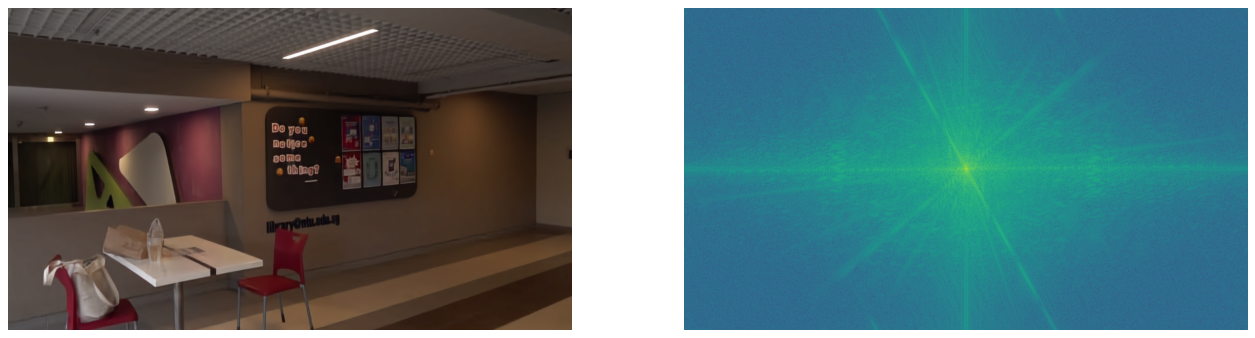

In [10]:
#plot of the img and its fft
plot_all([img_np, fft_np], figsize=(20, 10))

In [11]:
# now we follow the same process for the low_res one
# but first we resize the image
img_np_low = resize_img(img, scale=8)

img_tensor_low = to_torch(img_np_low)
fft_low = freq_amplitude(img_tensor_low)

fft_np_low = to_numpy(fft_low)

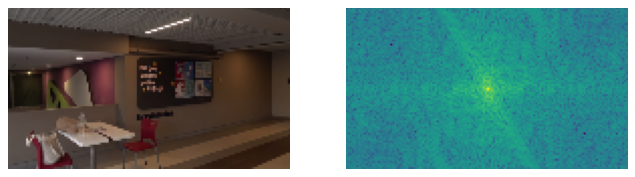

In [12]:
plot_all([img_np_low, fft_np_low], figsize=(10, 5))

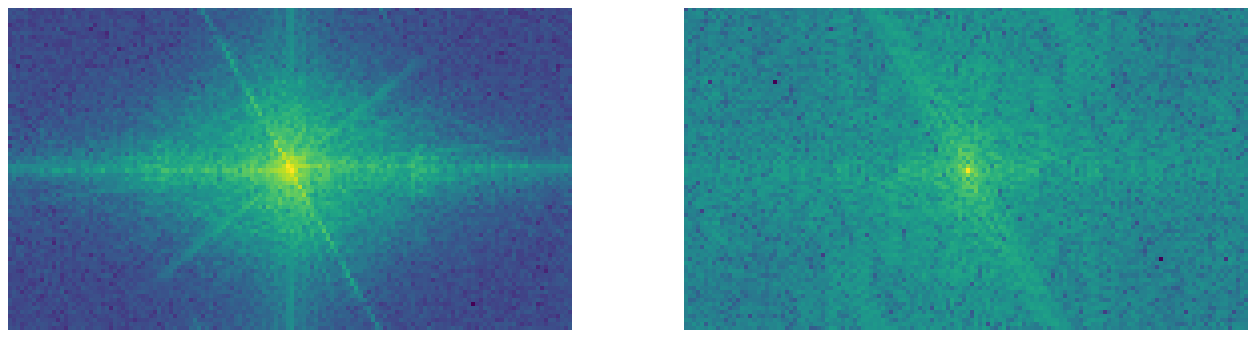

In [13]:
plot_all([resize_img(fft_np), fft_np_low])